In [3]:
import os
import json
import shutil
from pathlib import Path
import builtins

# Load your JSON data here, it might come from a file or directly as a string
file_path = "./test_data_set.json"
with open(file_path, "r") as json_file:
    # Load the JSON data into a Python dictionary
    json_data = json.load(json_file)

destination_root = Path("./copied_files")

# Function to handle copying and path updating
def copy_files_update_path(file_paths, root_dest):
    updated_paths = []
    for file_path in file_paths:
        dest_path = root_dest / Path(file_path).name
        shutil.copy(file_path, dest_path)
        updated_paths.append(str(dest_path))
    return updated_paths
# Specify the root destination directory where files will be copied

def copy_and_update_paths(json_data, destination_root):
    # Ensure the root destination exists
    destination_root.mkdir(parents=True, exist_ok=True)
    

    # Iterate through the JSON structure
    for key in json_data:
        if isinstance(json_data[key], list):
            if key == "caption": 
                continue
            for i, item in enumerate(json_data[key]):
                if isinstance(item, list):
                    # Copy files and update paths for nested lists
                    json_data[key][i] = copy_files_update_path(item, destination_root / key)
                else:
                    # Handle non-list items if necessary
                    pass
        else:
            # Handle non-list top-level items if necessary
            pass

    # Return the updated JSON data
    return json_data

# Process the JSON data
updated_json_data = copy_and_update_paths(json_data, destination_root)

# Save the updated JSON data to a file
updated_json_path = destination_root / "updated_data.json"
with open(updated_json_path, 'w') as json_file:
    json.dump(updated_json_data, json_file, indent=4)

print(f"Updated JSON data saved to {updated_json_path}")


Updated JSON data saved to copied_files/updated_data.json


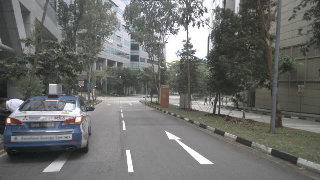

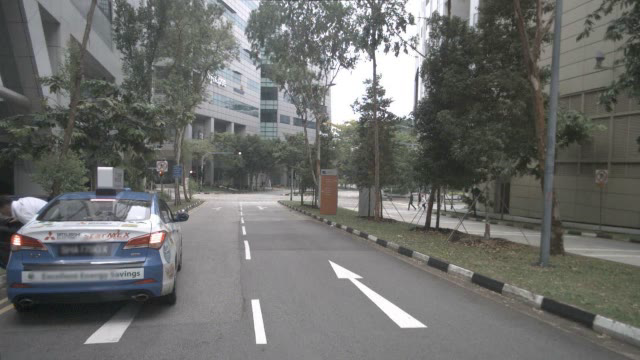

In [5]:
# import an image
from torchvision.transforms import ToTensor, ToPILImage
from PIL import Image

# Open an image file
image_path = "./frame2.png"
img = Image.open(image_path)

to_tensor = ToTensor()

# Convert the image to a tensor
img_tensor = to_tensor(img)

# use the torch interpolate function to scale the image 0.5x
import torch
import torch.nn.functional as F

# Scale the image 0.5x
scaled_img_tensor = F.interpolate(img_tensor.unsqueeze(0), scale_factor=0.5, mode='nearest')

# Convert the tensor back to an image
scaled_img = ToPILImage()(scaled_img_tensor.squeeze(0))

# Display the image
scaled_img.show()
img.show()


In [3]:
# read a json file
import json
updated_json_path = "/home/wisley/custom_diffusers_library/src/diffusers/jasper/validation.json"
# Load the JSON data
with open(updated_json_path, 'r') as json_file:
    data = json.load(json_file)

keys_to_remove = []
# Find keys that do not contain 'scene-0021'
for i, key in enumerate(data['scene_name']):
    if 'scene-0021' not in key:
        keys_to_remove.append(i)

# Remove keys from all dictionaries in the data
for key in data:
    for index in sorted(keys_to_remove, reverse=True):
        del data[key][index]

# Save the updated data back to the JSON file
with open(updated_json_path, 'w') as json_file:
    json.dump(data, json_file, indent=4)  # indent for better readability


In [5]:
import inspect

import diffusers.pipelines.stable_video_diffusion.pipeline_stable_video_diffusion_with_controlnet 

# Get the source file path of the module
module_source_file = inspect.getsourcefile(diffusers.pipelines.stable_video_diffusion.pipeline_stable_video_diffusion_with_controlnet)

# Open the source file for reading
with open(module_source_file, 'r') as source_file:
    source_code = source_file.read()

# Write the source code to a new file
output_file_path = "module_source_code.py"  # Specify the output file path
with open(output_file_path, 'w') as output_file:
    output_file.write(source_code)